In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from bubbly.bubbly import bubbleplot 
from plotly.offline import iplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_co2 = pd.read_csv('top_co2_diff.csv') 
df_inc = pd.read_csv('top_income_diff.csv')

df_co2.info()
df_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       179 non-null    int64  
 1   Country     179 non-null    object 
 2   CO2_new     179 non-null    float64
 3   CO2_last    179 non-null    float64
 4   difference  179 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  262 non-null    object 
 1   GDP_per_capita_USD_New   262 non-null    float64
 2   GDP_per_capita_USD_Last  262 non-null    float64
 3   difference               262 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.3+ KB


In [3]:
df_co2 = df_co2.rename(columns={"Country Name": "Country"})
df_co2=df_co2.sort_values(by=['Country']).reset_index(drop=True)
df_co2

index        Country  CO2_new  CO2_last  difference
0        0    Afghanistan     0.16      0.07        0.09
1        1        Albania     1.69      0.61        1.08
2        2        Algeria     3.98      2.66        1.32
3        3        Andorra     6.48      6.73       -0.25
4        4         Angola     0.79      0.91       -0.12
..     ...            ...      ...       ...         ...
174    174  Venezuela, RB     3.94      5.20       -1.26
175    175        Vietnam     3.49      0.42        3.07
176    176    Yemen, Rep.     0.38      0.71       -0.33
177    177         Zambia     0.38      0.23        0.15
178    178       Zimbabwe     0.80      1.36       -0.56

[179 rows x 5 columns]

In [4]:
df_inc=df_inc.rename(columns={"Country Name": "Country"})
df_inc

Country  GDP_per_capita_USD_New  \
0               Liechtenstein           169049.156900   
1                      Monaco           189487.147100   
2                     Bermuda           116153.166100   
3                 Isle of Man            86481.552590   
4            Macao SAR, China            86197.365690   
..                        ...                     ...   
257                   Curacao            19024.177230   
258               South Sudan             1119.651437   
259  Northern Mariana Islands            20659.640290   
260      Syrian Arab Republic             1265.606190   
261                     Japan            40458.001880   

     GDP_per_capita_USD_Last    difference  
0               78631.699110  90417.457790  
1              101866.604100  87620.543000  
2               33989.723160  82163.442940  
3               12681.614150  73799.938440  
4               18277.042500  67920.323190  
..                       ...           ...  
257             19446.456570   -422.279340  
258              1669.493752   -549.842315  
259             21981.784560  -1322.144270  
260              3545.808903  -2280.202713  
261             44197.619100  -3739.617220  

[262 rows x 4 columns]

In [5]:
df = pd.merge(df_co2, df_inc, how ='inner', on =['Country'])
df = df.rename(columns={"difference_x": "co2_diff", "difference_y": "income_diff"}).sort_values(by=['Country']).drop('index', axis=1)
df

Country  CO2_new  CO2_last  co2_diff  GDP_per_capita_USD_New  \
0      Afghanistan     0.16      0.07      0.09              494.179350   
1          Albania     1.69      0.61      1.08             5396.215864   
2          Algeria     3.98      2.66      1.32             3989.668276   
3          Andorra     6.48      6.73     -0.25            40898.417910   
4           Angola     0.79      0.91     -0.12             2177.799015   
..             ...      ...       ...       ...                     ...   
173  Venezuela, RB     3.94      5.20     -1.26            16055.645320   
174        Vietnam     3.49      0.42      3.07             3425.089253   
175    Yemen, Rep.     0.38      0.71     -0.33              750.554583   
176         Zambia     0.38      0.23      0.15             1305.001031   
177       Zimbabwe     0.80      1.36     -0.56             1316.740657   

     GDP_per_capita_USD_Last   income_diff  
0                 179.426579    314.752771  
1                 750.604449   4645.611415  
2                1452.278434   2537.389842  
3               18458.173990  22440.243920  
4                 397.179479   1780.619536  
..                       ...           ...  
173              3529.589128  12526.056192  
174               276.812663   3148.276590  
175               285.569593    464.984990  
176               418.515025    886.486006  
177               623.209585    693.531072  

[178 rows x 7 columns]

In [6]:
# global yearly stats:
# - average, min, max temperature per year 
# - date and location (city/country/region) of lowest temperature during this year
# - date and location (city/country/region) of highest temperature during this year

df = df.sort_values(by=['co2_diff'], ascending=False)
# hottest cities graph
table = px.bar(df.head(20),
                      x='Country',
                      y='co2_diff',
                      color='co2_diff',
                      color_continuous_scale=['blue','red'],
                      hover_data=['Country', 'co2_diff'],
                      opacity=0.8)

table.show()

table2 = px.bar(df.tail(20),
                      x='Country',
                      y='co2_diff',
                      color='co2_diff',
                      color_continuous_scale=['blue','red'],
                      hover_data=['Country', 'co2_diff'],
                      opacity=0.8)

table2.show()

df = df.sort_values(by=['income_diff'], ascending=False)

table = px.bar(df.head(20),
                      x='Country',
                      y='income_diff',
                      color='income_diff',
                      labels={
                          "income_diff": "GDP change",
                          "Country": "Country",
                      },
                      color_continuous_scale=['blue','red'],
                      hover_data=['Country', 'income_diff'],
                      opacity=0.8)

table.show()

table2 = px.bar(df.tail(20),
                      x='Country',
                      y='income_diff',
                      color='income_diff',
                      labels={
                          "income_diff": "GDP change",
                          "Country": "Country",
                      },
                      color_continuous_scale=['blue','red'],
                      hover_data=['Country', 'income_diff'],
                      opacity=0.8)


table2.show()


In [7]:
df = df.sort_values(by=['income_diff'], ascending=False)
df_first_20_income = df.head(20)
df_last_20_income = df.tail(20)

df = df.sort_values(by=['co2_diff'], ascending=False)
df_first_20_co2 = df.head(20)
df_last_20_co2 = df.tail(20)

intersec_first_20 = np.intersect1d(df_first_20_income['Country'], df_first_20_co2['Country'])
#Intersect countries between the 20 countries with the highest income growth and the 25 countries with the highest increase in temperature
#Geliri en çok artan 20 ülke ve aynı zamanda CO2 en çok artan 20 ülke arasında ortak olanlar
print(intersec_first_20)
intersec_last_20 = np.intersect1d(df_last_20_co2['Country'], df_last_20_income['Country'])
#Intersects  countries whose income growth between at least 20 countries and temperature rises between at least 25 countries
#Geliri en az artan 20 ülke ve aynı zamanda sıcaklığı en az artan 20 ülke arasında ortak olanlar
print(intersec_last_20)


['Korea, Rep.']
[]


In [8]:
intersec_last_incame_first_co2_20 = np.intersect1d(df_last_20_income['Country'], df_first_20_co2['Country'])
#Geliri en az artan 20 ülke ve aynı zamanda sıcaklığı en çok artan 20 ülke arasında ortak olanlar
print(intersec_last_incame_first_co2_20)

intersec_first_incame_last_co2_20 = np.intersect1d(df_first_20_income['Country'], df_last_20_co2['Country'])
#Geliri en çok artan 20 ülke ve aynı zamanda co2 en az artan 20 ülke arasında ortak olanlar
print(intersec_first_incame_last_co2_20)

[]
['Belgium' 'Denmark' 'Finland' 'Iceland' 'Ireland' 'Israel'
 'Liechtenstein' 'Malta' 'Sweden' 'Switzerland' 'United Kingdom']


In [9]:
intersec_first_20_df = pd.DataFrame(intersec_first_20, columns = ['Country'])
intersec_first_20_df.to_csv('intersec_first_20.csv', index=False)

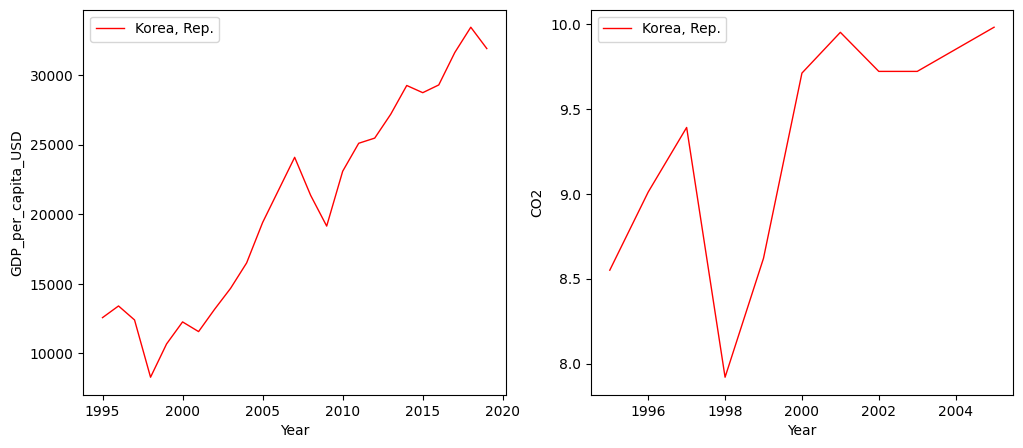

In [10]:
intersec_country = pd.DataFrame()
cleaned_income_change=pd.read_csv("cleaned_income_change.csv")
cleaned_co2=pd.read_csv("top_co2.csv")
cleaned_co2 = cleaned_co2.rename(columns={"Country Name": "Country"})
colors = ['red', 'blue', 'orange', 'brown', 'green']
index = 0
intersec_firsts_income = pd.DataFrame()
intersec_firsts_co2 = pd.DataFrame()
for value in intersec_first_20:
    if(df[df['Country'] == value] is not None):
        intersec_country = pd.concat([intersec_country, df[df['Country'] == value]], ignore_index = True)
        country_income = cleaned_income_change[cleaned_income_change['Country Name'] == value]
        country_co2 = cleaned_co2[cleaned_co2['Country'] == value]
        intersec_firsts_income = pd.concat([intersec_firsts_income, country_income], ignore_index = True)
        intersec_firsts_co2 = pd.concat([intersec_firsts_co2, country_co2], ignore_index = True)
        fig, ax =plt.subplots(1,2, figsize=(12, 5))
        sns.lineplot(x = 'Year', y = 'GDP_per_capita_USD', color = colors[index], label=value, markers = True, dashes = False, estimator = None, lw = 1, data = country_income,  ax=ax[0])
        sns.lineplot(x = 'Year', y = 'CO2', color = colors[index], label=value, markers = True, dashes = False, estimator = None, lw = 1, data = country_co2,  ax=ax[1])
        index = (index + 1) % len(colors)
        fig.show()

    



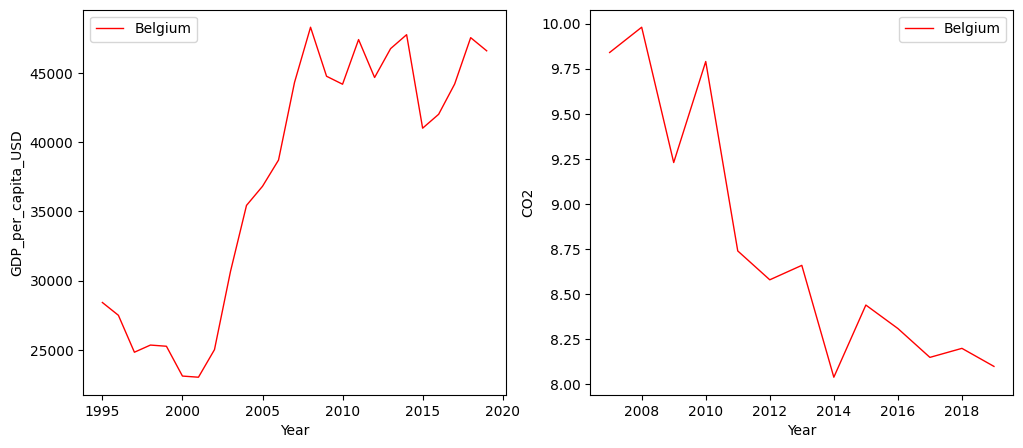

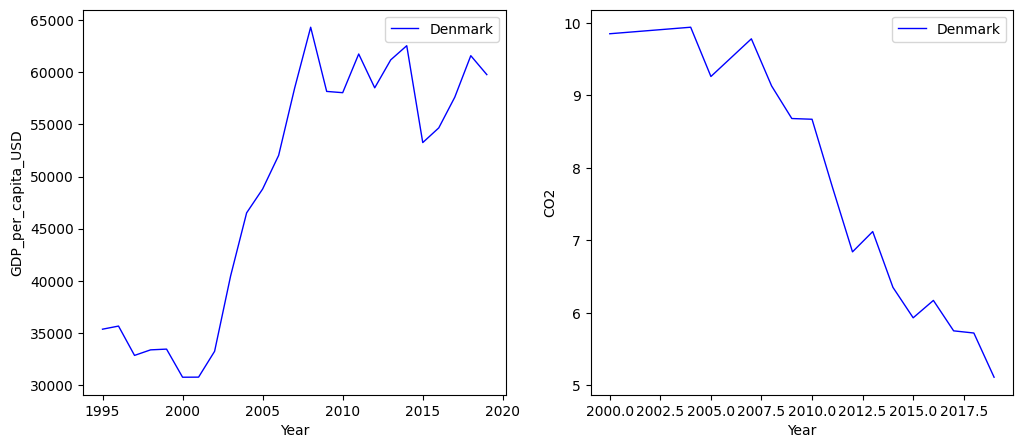

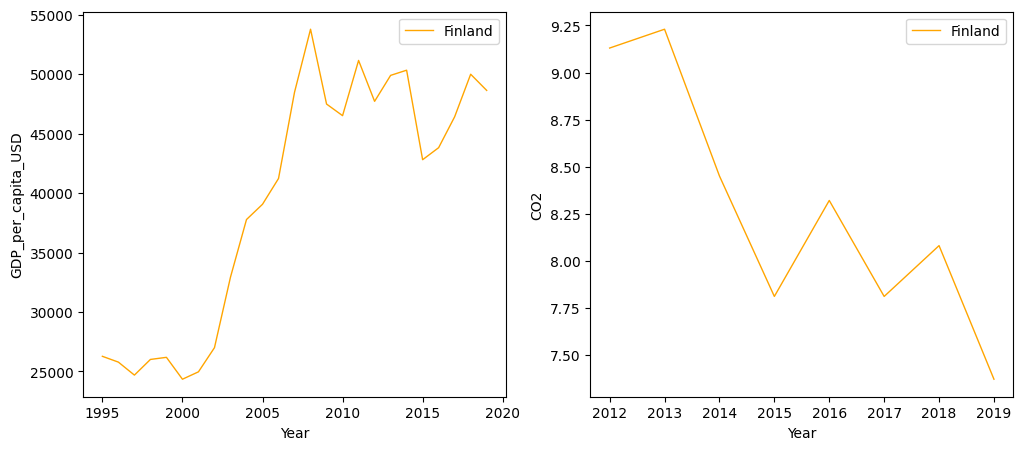

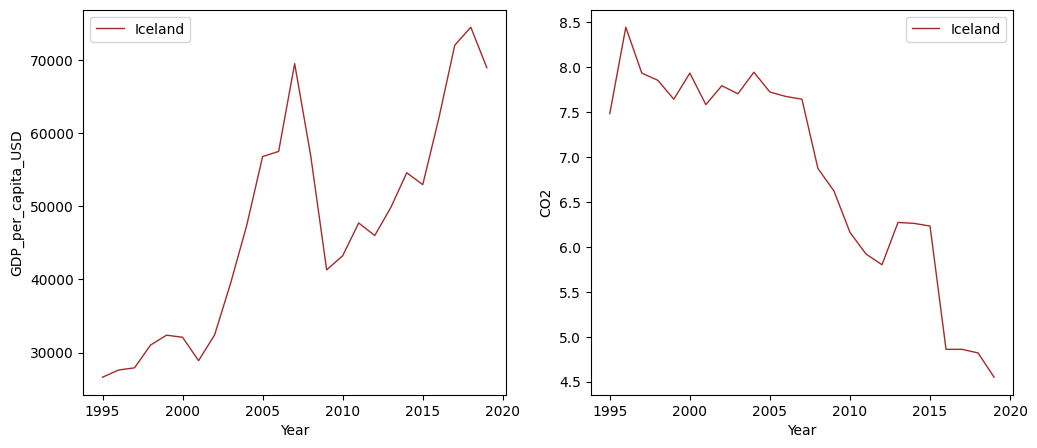

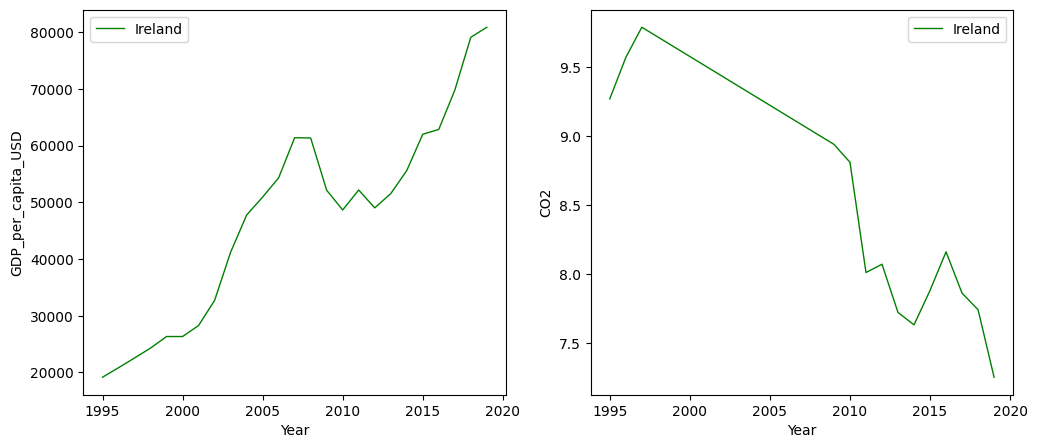

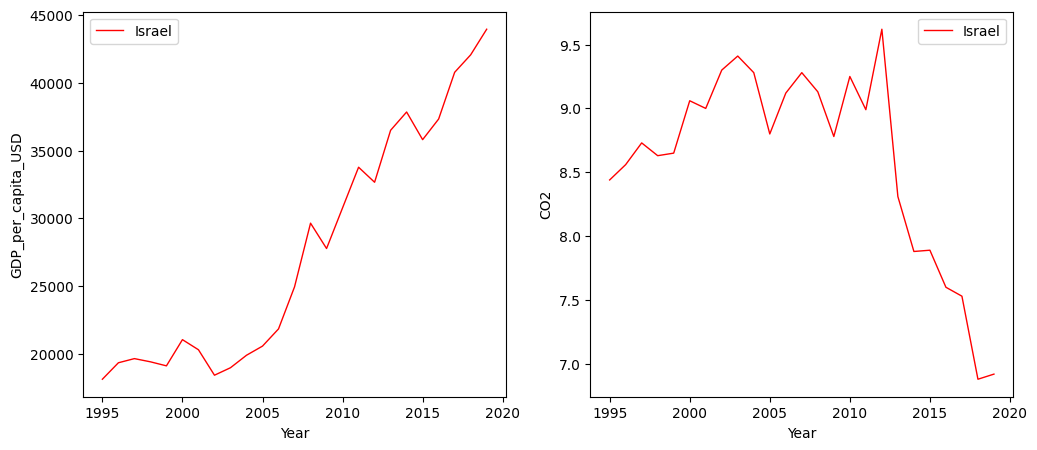

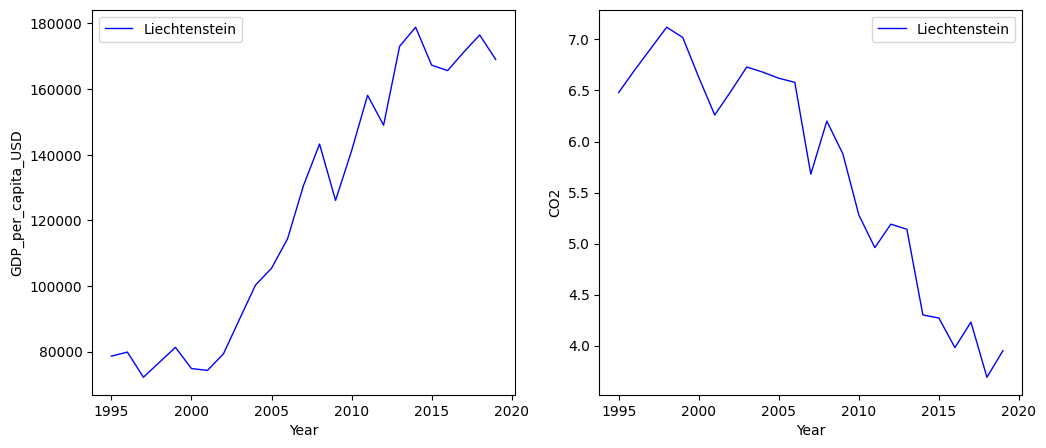

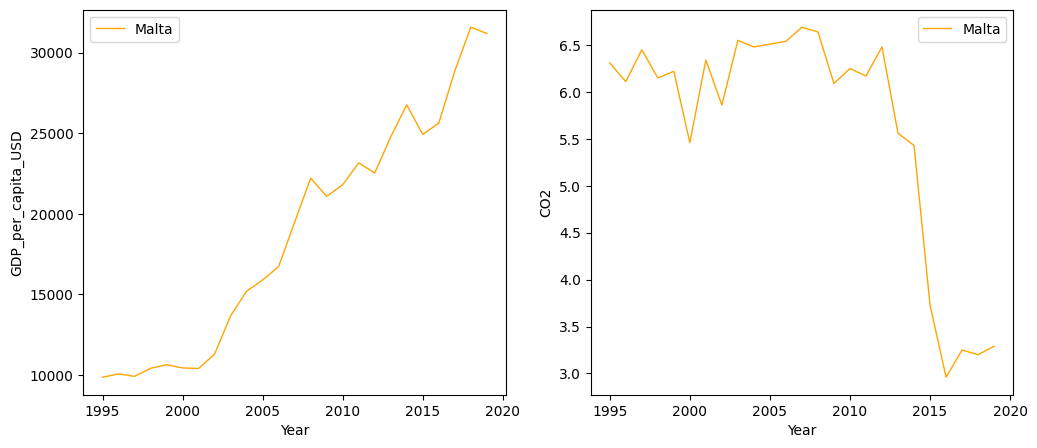

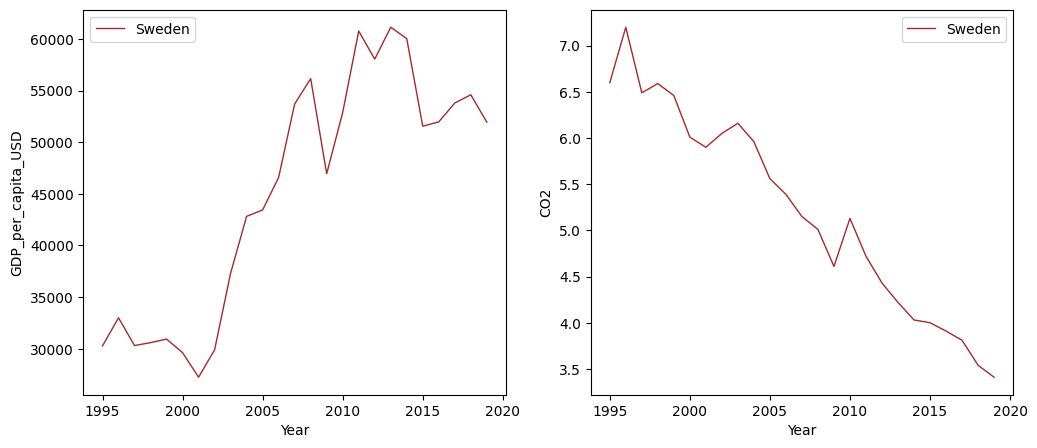

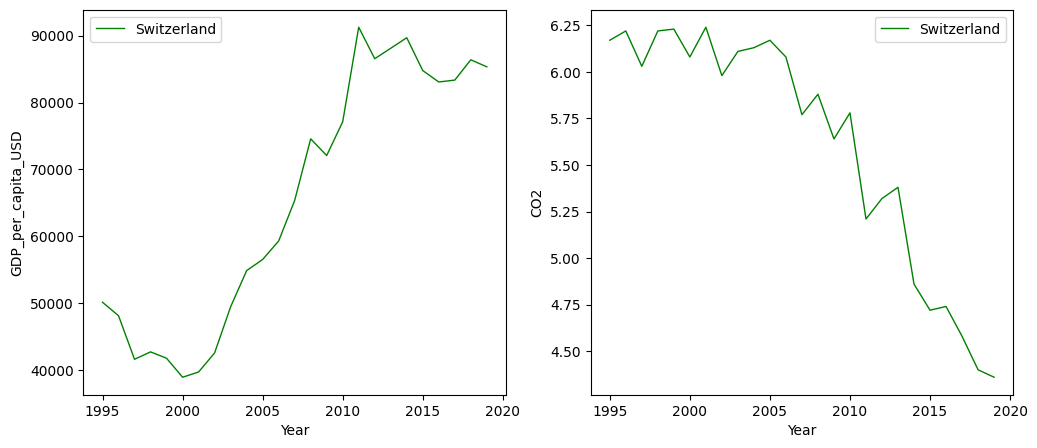

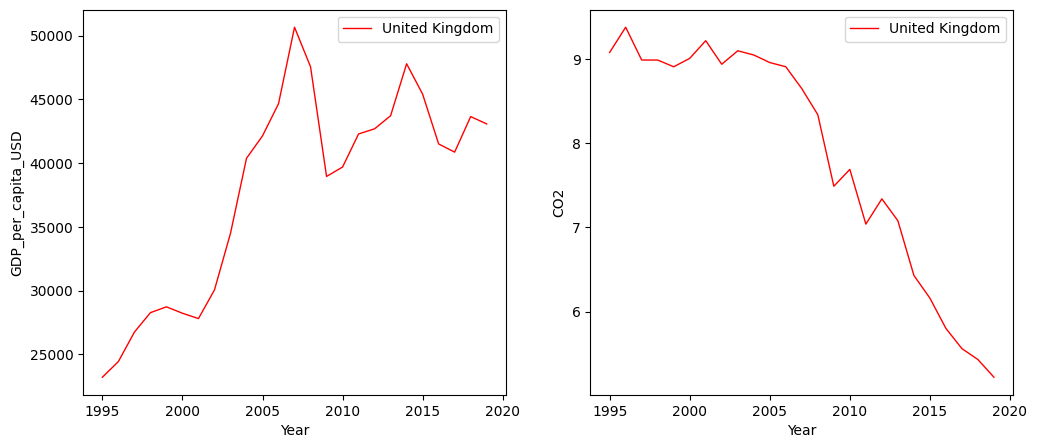

In [11]:
intersec_country = pd.DataFrame()
cleaned_income_change=pd.read_csv("cleaned_income_change.csv")
cleaned_co2=pd.read_csv("top_co2.csv")
cleaned_co2 = cleaned_co2.rename(columns={"Country Name": "Country"})
colors = ['red', 'blue', 'orange', 'brown', 'green']
index = 0
for value in intersec_first_incame_last_co2_20:
    if(df[df['Country'] == value] is not None):
        intersec_country = pd.concat([intersec_country, df[df['Country'] == value]], ignore_index = True)
        country_income = cleaned_income_change[cleaned_income_change['Country Name'] == value]
        country_co2 = cleaned_co2[cleaned_co2['Country'] == value]
        fig, ax =plt.subplots(1,2, figsize=(12, 5))
        sns.lineplot(x = 'Year', y = 'GDP_per_capita_USD', color = colors[index], label=value, markers = True, dashes = False, estimator = None, lw = 1, data = country_income,  ax=ax[0])
        sns.lineplot(x = 'Year', y = 'CO2', color = colors[index], label=value, markers = True, dashes = False, estimator = None, lw = 1, data = country_co2,  ax=ax[1])
        index = (index + 1) % len(colors)
        fig.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


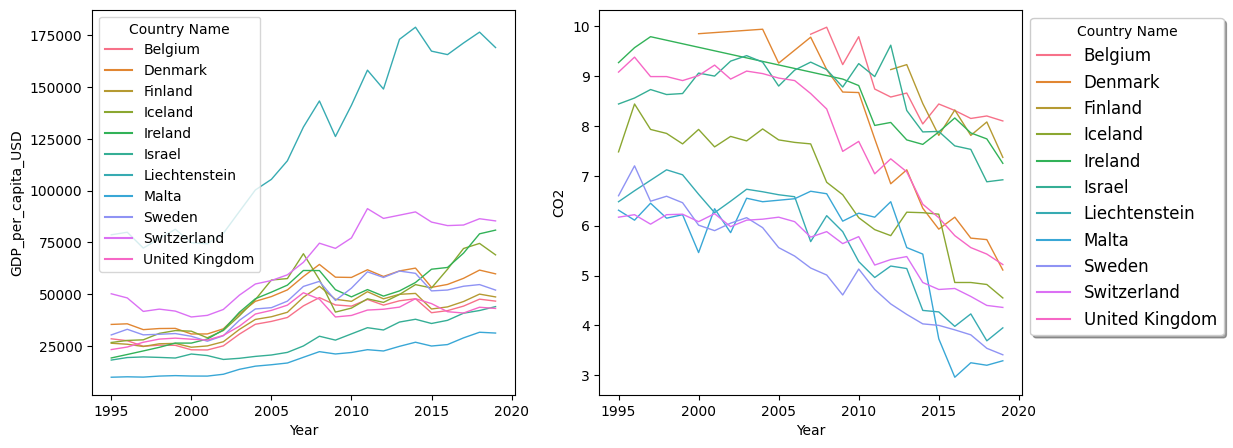

In [12]:
intersec_country = pd.DataFrame()
cleaned_income_change=pd.read_csv("cleaned_income_change.csv")
cleaned_co2=pd.read_csv("top_co2.csv")
cleaned_co2 = cleaned_co2.rename(columns={"Country Name": "Country"})
colors = ['red', 'blue', 'orange', 'brown', 'green']
index = 0
GDP = pd.DataFrame()
CO2 = pd.DataFrame()
fig, ax =plt.subplots(1,2, figsize=(12, 5))
for value in intersec_first_incame_last_co2_20:
    if(df[df['Country'] == value] is not None):
        intersec_country = pd.concat([intersec_country, df[df['Country'] == value]], ignore_index = True)
        country_income = cleaned_income_change[cleaned_income_change['Country Name'] == value]
        country_co2 = cleaned_co2[cleaned_co2['Country'] == value]
        GDP = pd.concat([GDP, country_income], ignore_index = True)
        CO2 = pd.concat([CO2, country_co2], ignore_index = True)

        index = (index + 1) % len(colors)

sns.lineplot(x = 'Year', y = 'GDP_per_capita_USD',hue = 'Country Name', units = 'Country Name', markers = True, dashes = False, estimator = None, lw = 1, data = GDP, ax=ax[0])
plt.legend(bbox_to_anchor = (1, 1), shadow = True, fontsize = 'large', title = 'Country Name')

sns.lineplot(x = 'Year', y = 'CO2',hue = 'Country', units = 'Country', markers = True, dashes = False, estimator = None, lw = 1, data = CO2, ax=ax[1])
plt.legend(bbox_to_anchor = (1, 1), shadow = True, fontsize = 'large', title = 'Country Name')
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


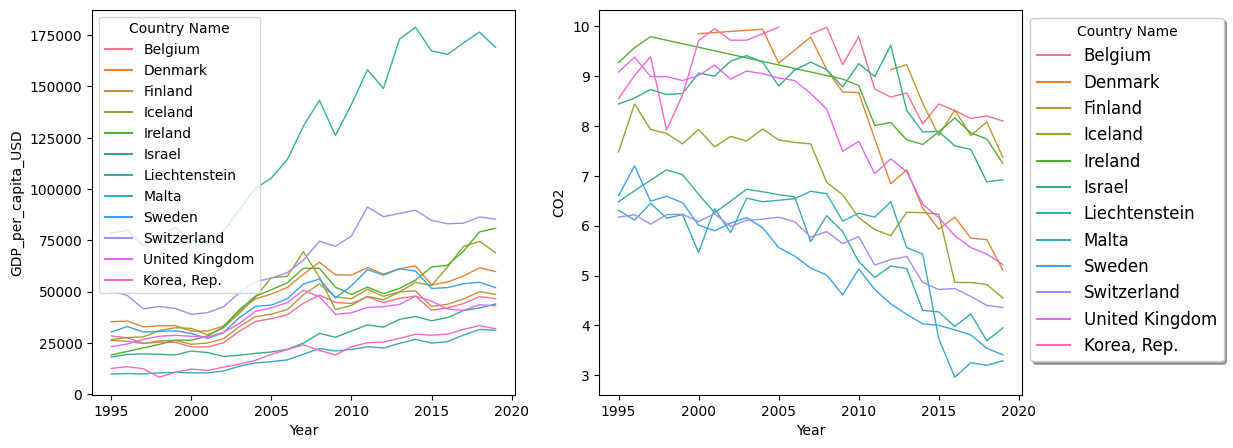

In [13]:
fig, ax =plt.subplots(1,2, figsize=(12, 5))
GDP = pd.concat([GDP, intersec_firsts_income], ignore_index = True)
CO2 = pd.concat([CO2, intersec_firsts_co2], ignore_index = True)

sns.lineplot(x = 'Year', y = 'GDP_per_capita_USD',hue = 'Country Name', units = 'Country Name', markers = True, dashes = False, estimator = None, lw = 1, data = GDP, ax=ax[0])
plt.legend(bbox_to_anchor = (1, 1), shadow = True, fontsize = 'large', title = 'Country Name')

sns.lineplot(x = 'Year', y = 'CO2',hue = 'Country', units = 'Country', markers = True, dashes = False, estimator = None, lw = 1, data = CO2, ax=ax[1])
plt.legend(bbox_to_anchor = (1, 1), shadow = True, fontsize = 'large', title = 'Country Name')
fig.show()